# ML pipelines - Data Analysis

Project Organization
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Predictions/Scoring

Reference site: [Kaggle.com](www.kaggle.com)

================================================================================

## Prediction Sale Price of Houses
The aim of the project is to build a ML model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses.

### Objective of the ML model
The goal is to minimise the difference betzeen the real price and the price estimated by our model. The model will be evaluated by mean of:
1. mean square error (MSE)
2. root squared of the mean squared error (RSMSE)
3. r-squared (R2)

# Data Analysis
Load the dataset

In [2]:
# For dataset handling
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For Yeo-Johnson Transformation
import scipy.stats as stats

# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# load dataset
data = pd.read_csv('dataset/train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# drop 'Id' column
data.drop('Id', axis=1, inplace=True)
data.head()
data.shape

(1460, 80)

The dataset now has:
 - 1460 rows
 - 80 columns (variables)

## Analysis
1. Target variable ('SalePrice')
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - discrete
    - continuous
    - distributions
    - transformation
5. Categorical variables
    - cardinality
    - rare labels
    - special mappings
6. Additional reading resources

### 1. Target variable
The target variable is 'salePrice' obviously. Let's analyse its distribution:

<function matplotlib.pyplot.show(close=None, block=None)>

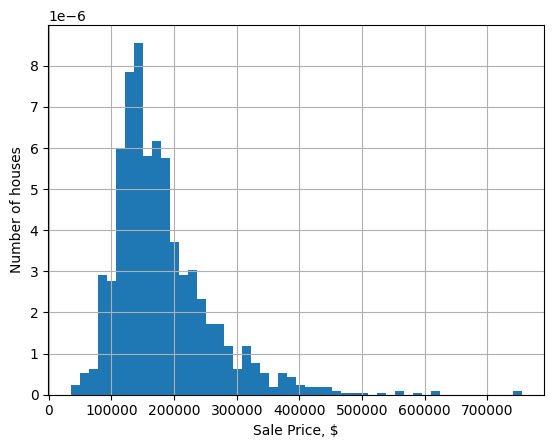

In [4]:
# histogram to evaluate target distribution
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price, $')
plt.show

The distribution is skewed towards the right; the value spread can be improved with a mathematical transformation.

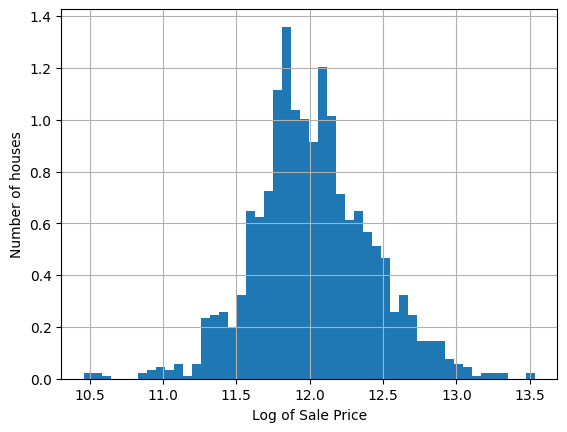

In [5]:
# target value distribution improved with a log transformation
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

Now the distribution looks more Gaussian.

In [6]:
data_mean = data['SalePrice'].mean()
data_var = data['SalePrice'].var()
print(data_mean, data_var)

180921.19589041095 6311111264.297448


### 2. Analysis of variable types
Let's identify the categorical and numerical variables

In [7]:
# Identification of categorical variables
cat_vars = [var for var in data.columns if data[var].dtype=='object']

# according to the documentation, also 'MSSubClass' is a categorical variable, so let'add it to the list
cat_vars = cat_vars + ['MSSubClass'
]
print(cat_vars, len(cat_vars))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass'] 44


In [8]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('object')

Now let's iidentify the numerical variables in the dataset

In [9]:
num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

print(num_vars, len(num_vars))


['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 35


### 3. Missing Values
Let's determine which variables contain missing values.

In [10]:
# list of variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimal) and display the result ordered by % of missing data
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

The top-most variables ('PooQC','MiscFeature','Alley','Fence') appear to contain a high percentage of missing values, whereas the other variables appear to have a lower percentage of missing values. In order to train the ML model, those values will need to be manually filled.

The percentages of missing values are:

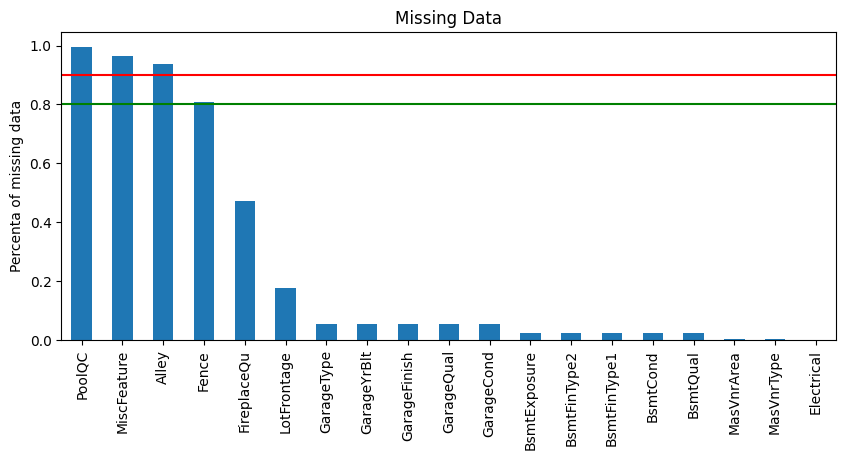

In [11]:
# plot

data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.title('Missing Data')
plt.ylabel('Percenta of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')
plt.show()

Now we can determine which variables, from those missing data, are categorical and which are numerical:

In [12]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with missing data: ', len(cat_na))
print('Number of numerica variables with missing data: ', len(num_na))


Number of categorical variables with missing data:  16
Number of numerica variables with missing data:  3


In [13]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [14]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

### Relationship between missing data and Sale PRice
Let's evaluate the price of the house in those observations where the information is missing (this procedure is repeated for each variable having missing data).

In [15]:
def analyse_na_value(df, var):

    # copy the datframe in order to be sure not to corrupt/edit the original data.Alley
    df = df.copy()

    # let's make an interim variable that assume the value 1 if the observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing vs the observations where data is available

    # determine the median price in the groups 1 and 0, and the standard deviation of the sale price, and we capture the results in a temporary dataset
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # print a table for each graph
    print(tmp)

    # plot into a bar graph
    tmp.plot(kind="barh", y='mean', legend=False, xerr='std', title='Sale Price', color='green')

    plt.show()


Let's run the function on each variable with missing data:

                      mean           std
LotFrontage                             
0            180770.480433  83389.519866
1            181620.073359  57841.775706


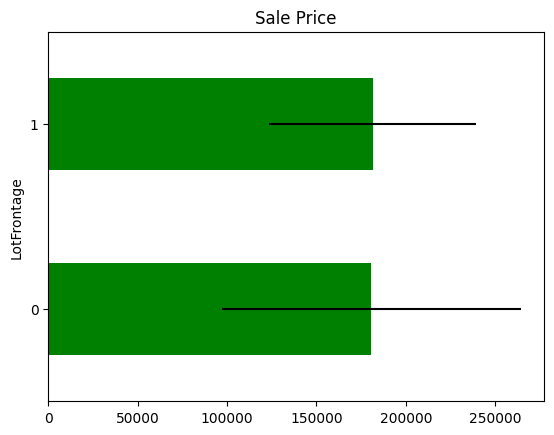

                mean           std
Alley                             
0      142845.912088  42867.137343
1      183452.131483  80667.145180


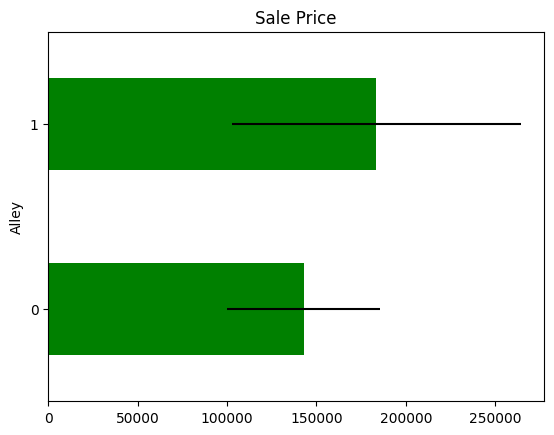

                     mean           std
MasVnrType                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968


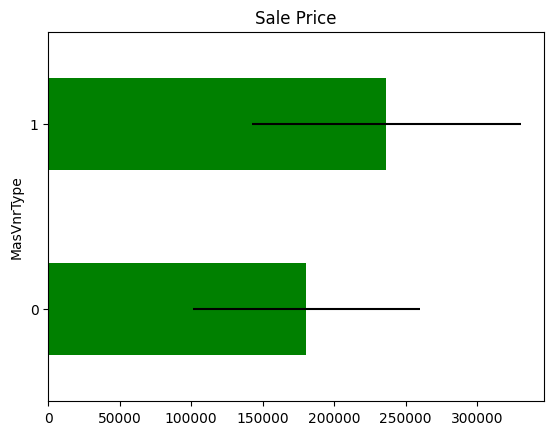

                     mean           std
MasVnrArea                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968


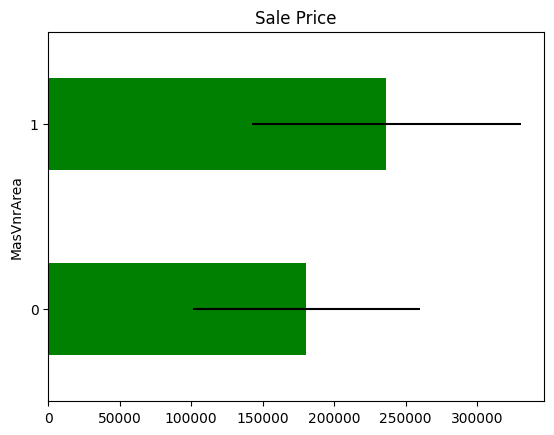

                   mean           std
BsmtQual                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797


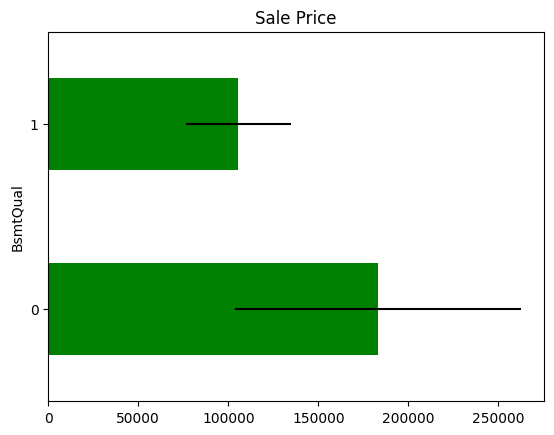

                   mean           std
BsmtCond                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797


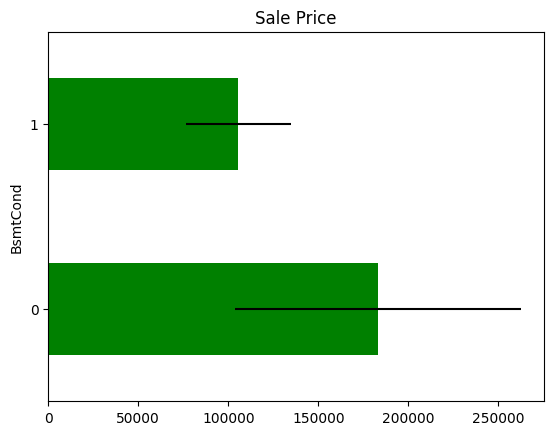

                       mean           std
BsmtExposure                             
0             182871.511252  79415.045187
1             107938.342105  32133.440664


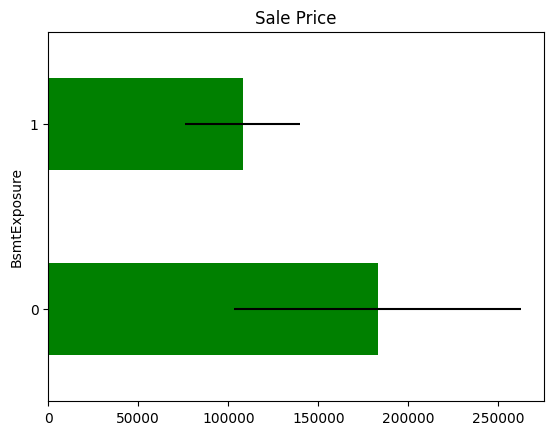

                       mean           std
BsmtFinType1                             
0             182878.277583  79387.526888
1             105652.891892  29278.694797


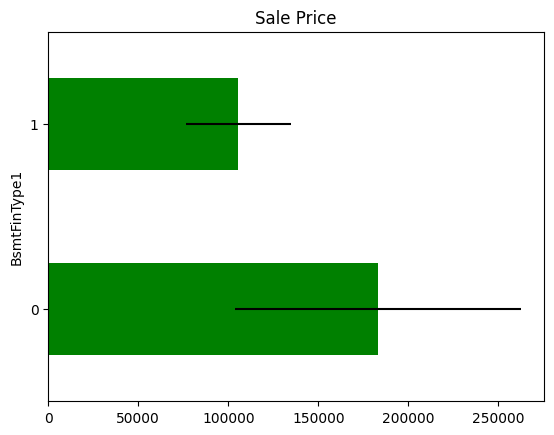

                       mean           std
BsmtFinType2                             
0             182807.165260  79370.104421
1             110346.236842  40879.307312


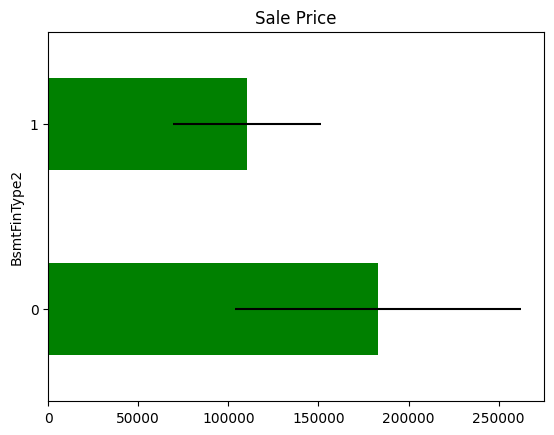

                     mean           std
Electrical                             
0           180930.394791  79468.964025
1           167500.000000           NaN


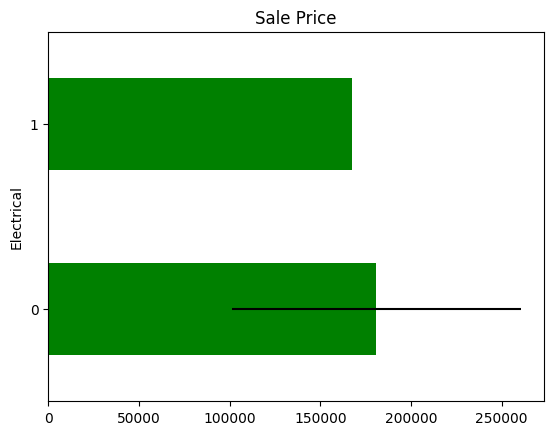

                      mean           std
FireplaceQu                             
0            216397.692208  86843.901262
1            141331.482609  44389.786884


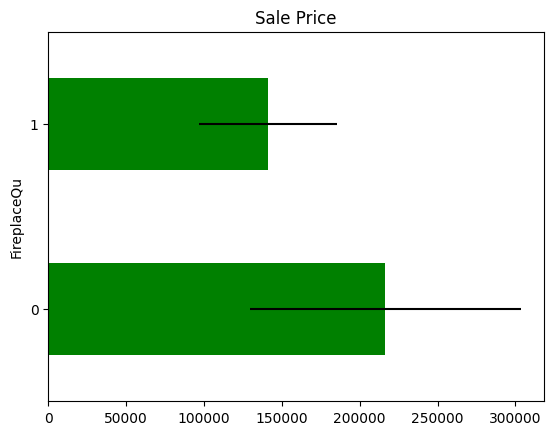

                     mean           std
GarageType                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


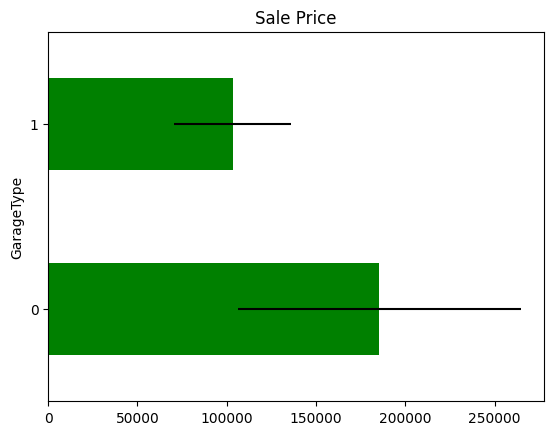

                      mean           std
GarageYrBlt                             
0            185479.511240  79023.890600
1            103317.283951  32815.023389


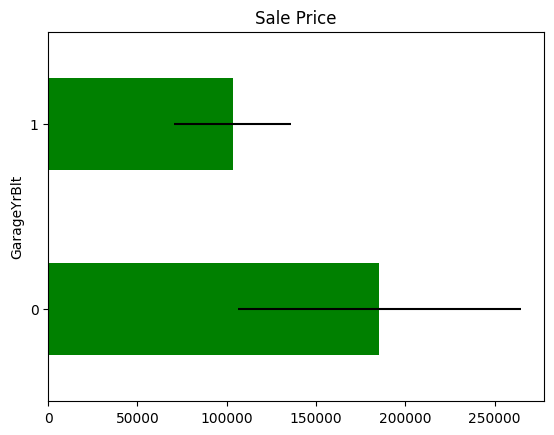

                       mean           std
GarageFinish                             
0             185479.511240  79023.890600
1             103317.283951  32815.023389


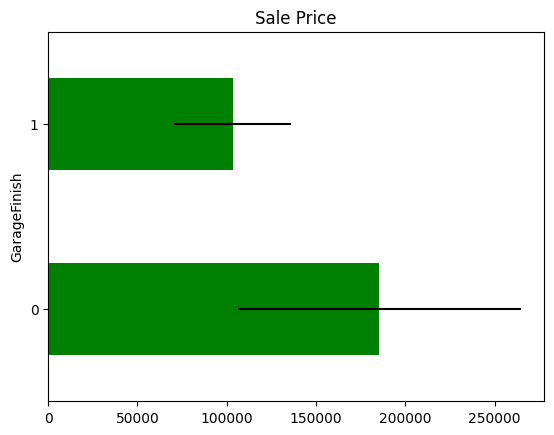

                     mean           std
GarageQual                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


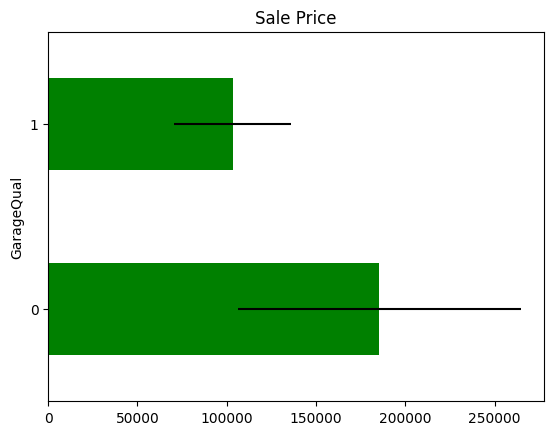

                     mean           std
GarageCond                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


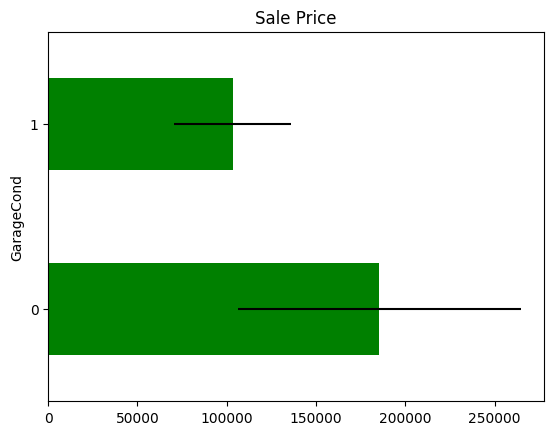

                 mean            std
PoolQC                              
0       288138.571429  206071.850935
1       180404.663455   78168.872519


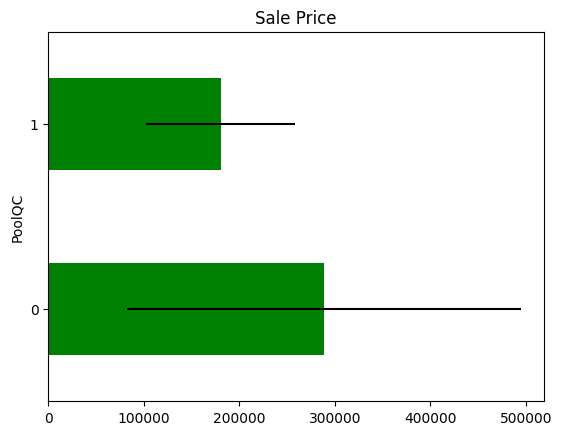

                mean           std
Fence                             
0      152912.007117  62113.736323
1      187596.837998  81656.497075


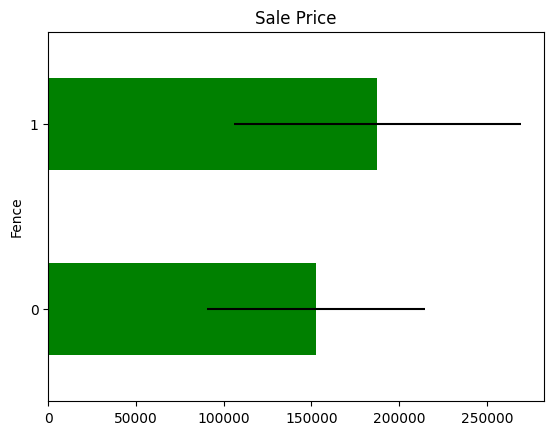

                      mean           std
MiscFeature                             
0            151623.944444  52996.542694
1            182046.410384  80084.136570


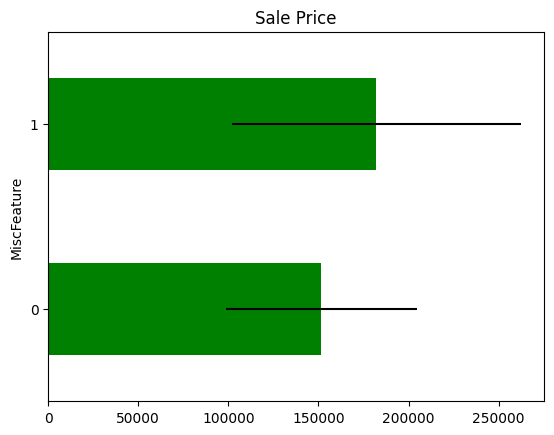

In [16]:
for var in vars_with_na: analyse_na_value(data, var)

In some variables, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

## Numerical Values
Let's now analyse the numerical variables that we have in the dataset.

In [17]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


### Temporal Variables
In the dataset we find 4 varibles containing an 'year' info:
 - `YearBuilt`: original construction date;
 - `YearRemodAdd`: Remodel date (same as construction date if no remodeling or additions);
 - `GarageYrBlt`: year garage was built;
 - `YrSold`: year in which the house was sold

Year are usually not used as per se in the analysis, but instead they are used to extract information from them. For example, we can capture the difference in years between the year the house was build and the year the house was sold.

In [18]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Year' in var or 'Yr' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Let's explore the values of these temporal variables

In [19]:
# explore the values contained in these variables
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As expected the values are years/ in `GarageYrBlt` there appears to be a `nan`value and in general all the other values appear to be float.

Let's explore the evolution of the sale price with the years in which the house was sold:

Text(0, 0.5, 'Median House Price')

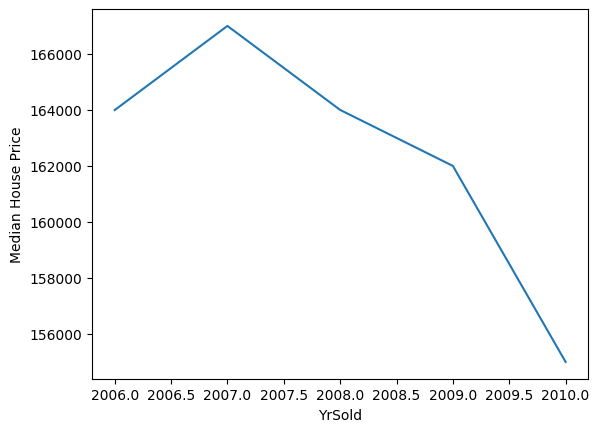

In [20]:
# plot median sale price vs year in which house was sold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

There has been a drop in the value of these houses. That is unusual, in real life, house prices typically go up as years go by. 

Let's explore a bit further.

Let's plot the price of sale vs years in which it was built:

Text(0, 0.5, 'Median House Price')

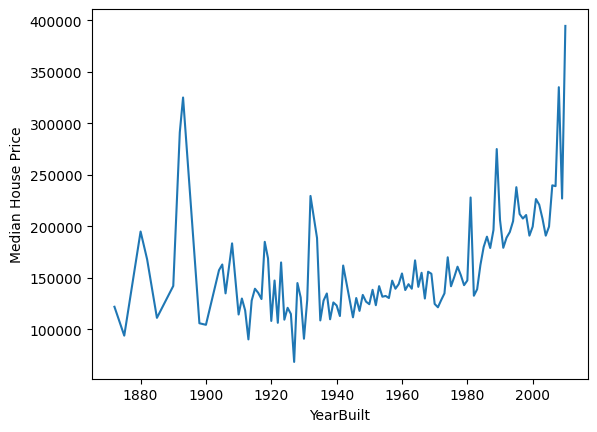

In [21]:
# plot median sale price vs year in which it was built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

We can see that newly built/younger houses tend to be more expensive.

Since the price of houses sold went down as the sell was more recent, and since from the previous graph it appears that the older the house's year of construction, the lower the house price, we might deduce that recently older hoses have been sold.

Let's have a look at that.

Let's capture the elapsed years between the Year variable and the year in which the house was sold.

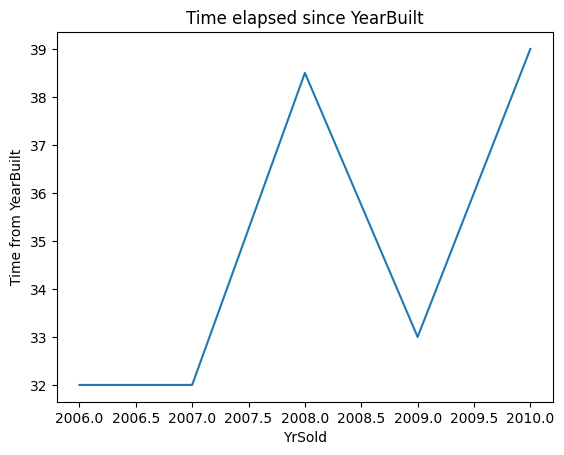

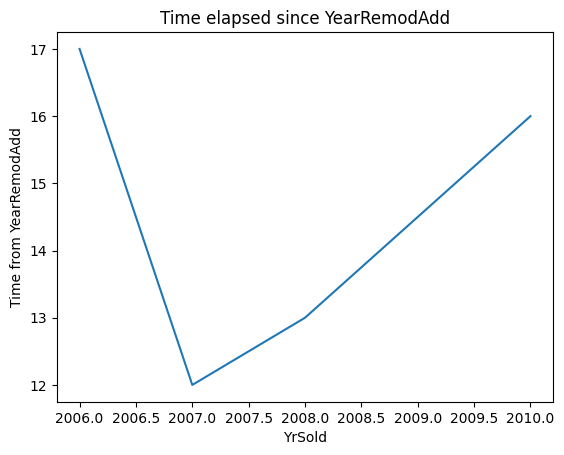

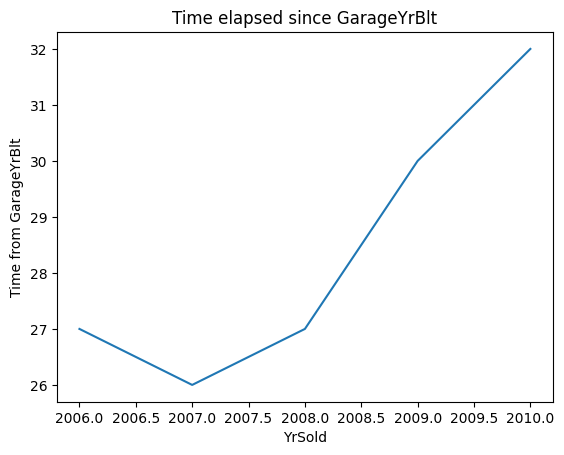

In [22]:
def analyse_year_vars(df, var):

    df = df.copy()

    # capture difference between a generic year variable and year in which the house was sold
    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.title('Time elapsed since '+ var)
    plt.ylabel('Time from ' + var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(data, var)



in 2009 there appear to have been a trend inversion: older houses have been sold, with older garages, not modelled recently. This might explain indeed the recent price drop in the sell prices.

Now we can plot the time since last remodelled, garage built, or time since built, and sale price, to see if there is a relationship.

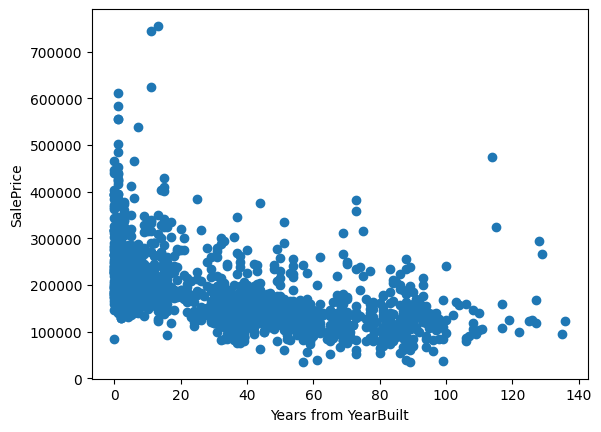

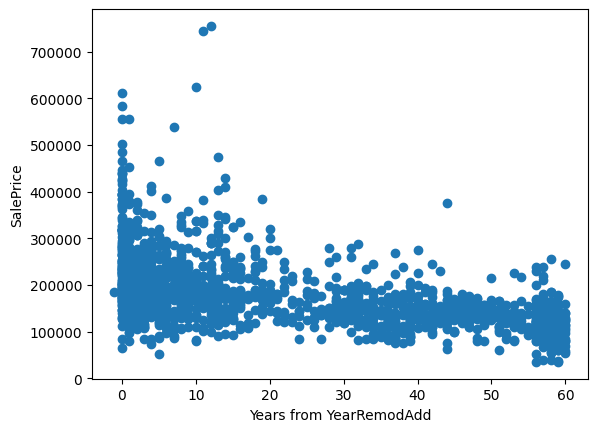

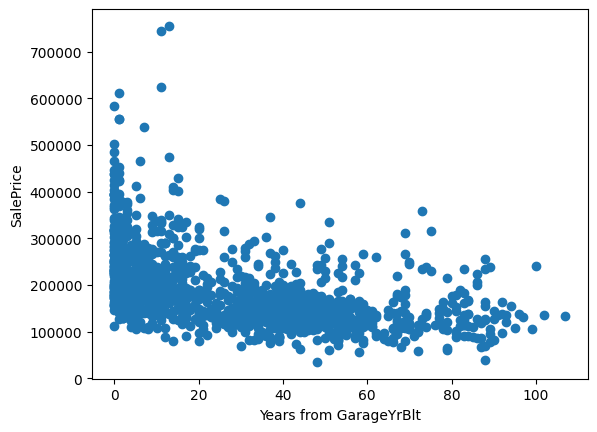

In [23]:
def analyse_year_vars_scatter(df, var):

    df = df.copy()

    # capture difference between a year variable and year in which the house was sold
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel('Years from ' +var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars_scatter(data, var)

We see that there is a tendency to decrease the price with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price.

Which makes sense, because this means that the house will have an older look, and potentially needs repairs.

## Discrete Variables

Let's find out which variables are discrete.

In [24]:
# let's make a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20 and var not in year_vars]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [25]:
# let's visualise the discrete variables
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variables tend to be qualifications (`Qual`) or grading scales (`Cond`), or refer to the number of rooms, or units (`FullBath`, `GarageCars`), or indicate the area of the room (`KitchenAbvGr`).

We expect higher prices, with bigger numbers.

Let's go ahead and analyse their contribution to the house price.

`MoSold`is the month in which the house was sold.

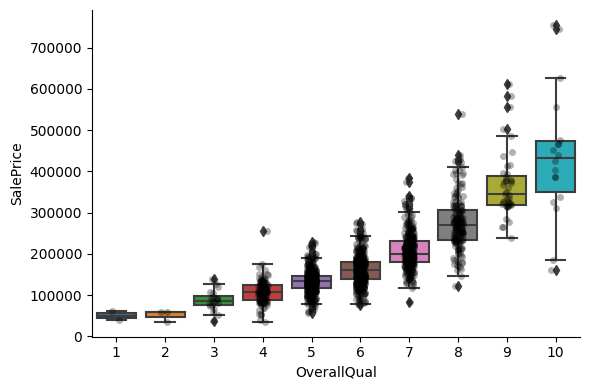

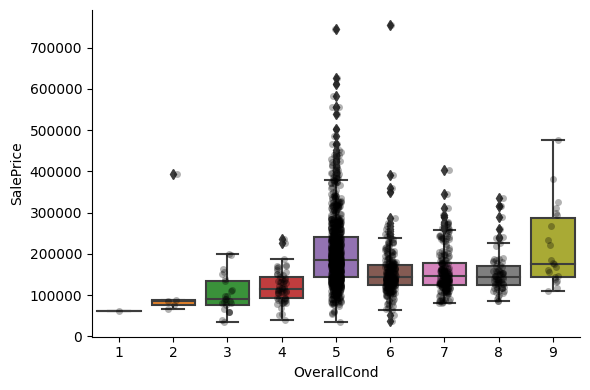

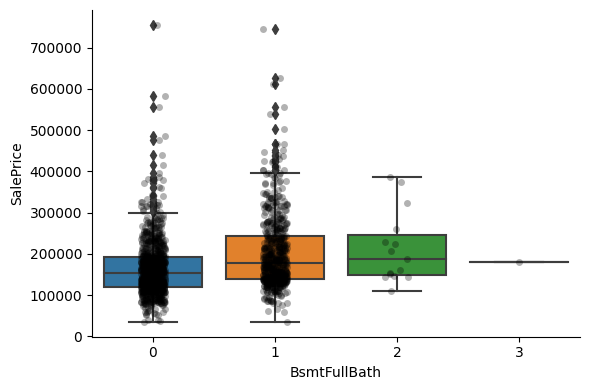

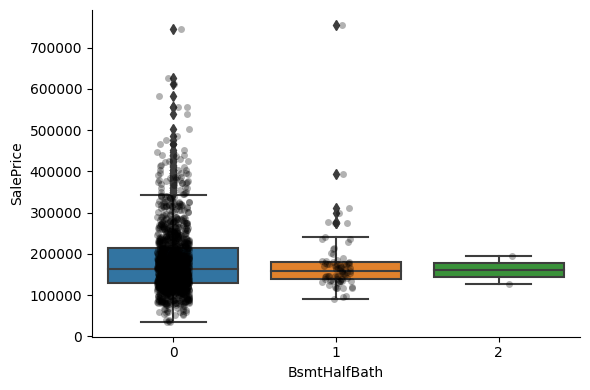

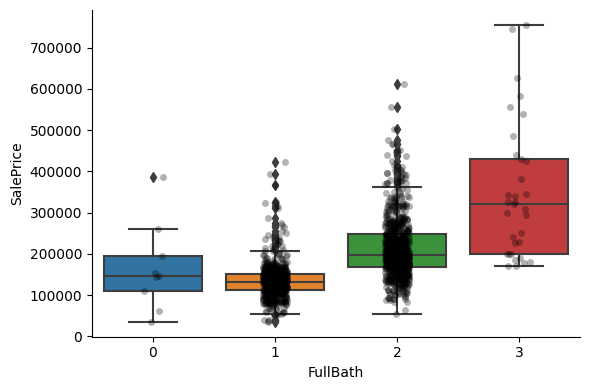

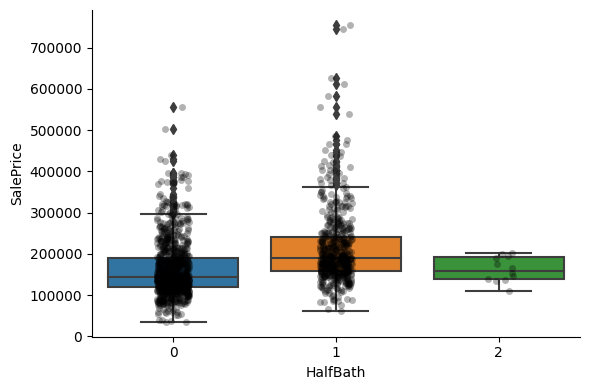

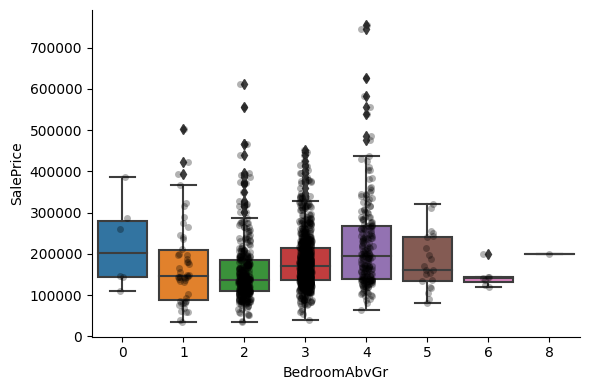

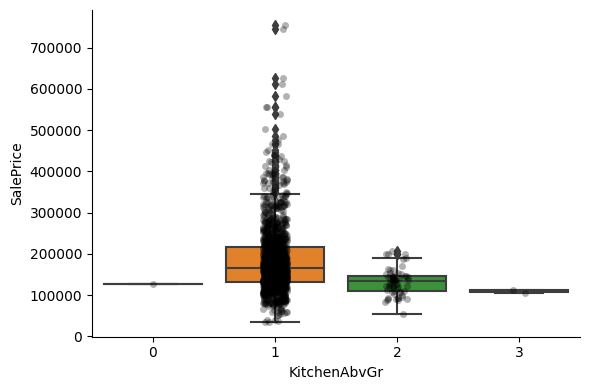

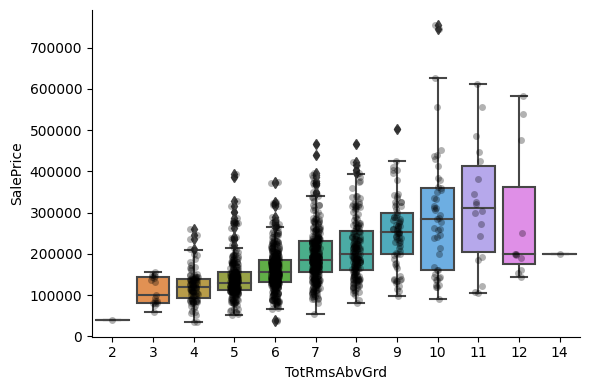

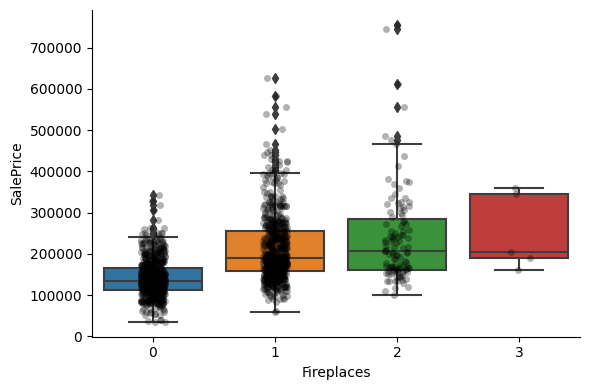

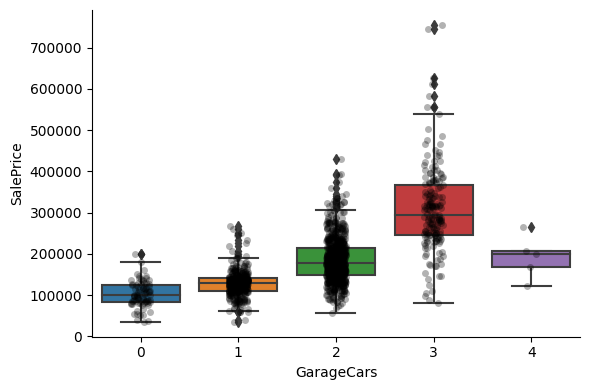

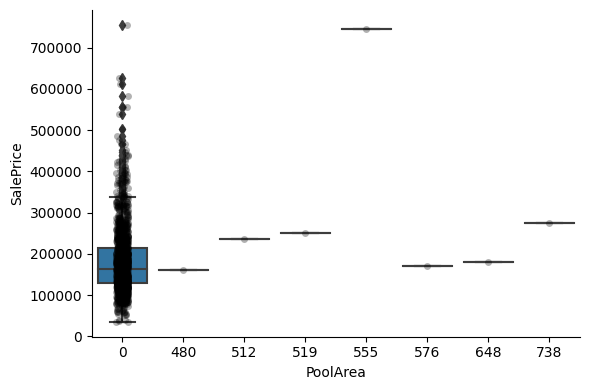

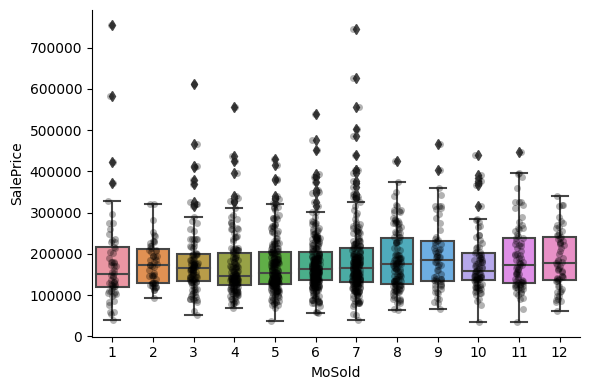

In [26]:
for var in discrete_vars:

    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)

    # add data points to boxplot with scripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')

    plt.show()

For many discrete numerical variables , we see an increase in the sale price, with the quality, or overall condition, or number of rooms, or surface.

For some variables, there is no visible tendency. Most likely that variable is not a good predictor of sale price.

## Continuous Variables

Let's now analyse the distribution of continuous variables. Continuous variables are considered those variables that are not numerical nor discrete.


In [28]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars and var not in year_vars]

print('Number of continuous vars: ', len(cont_vars))

Number of continuous vars:  18


In [29]:
# let's visualise the continuous variables

data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


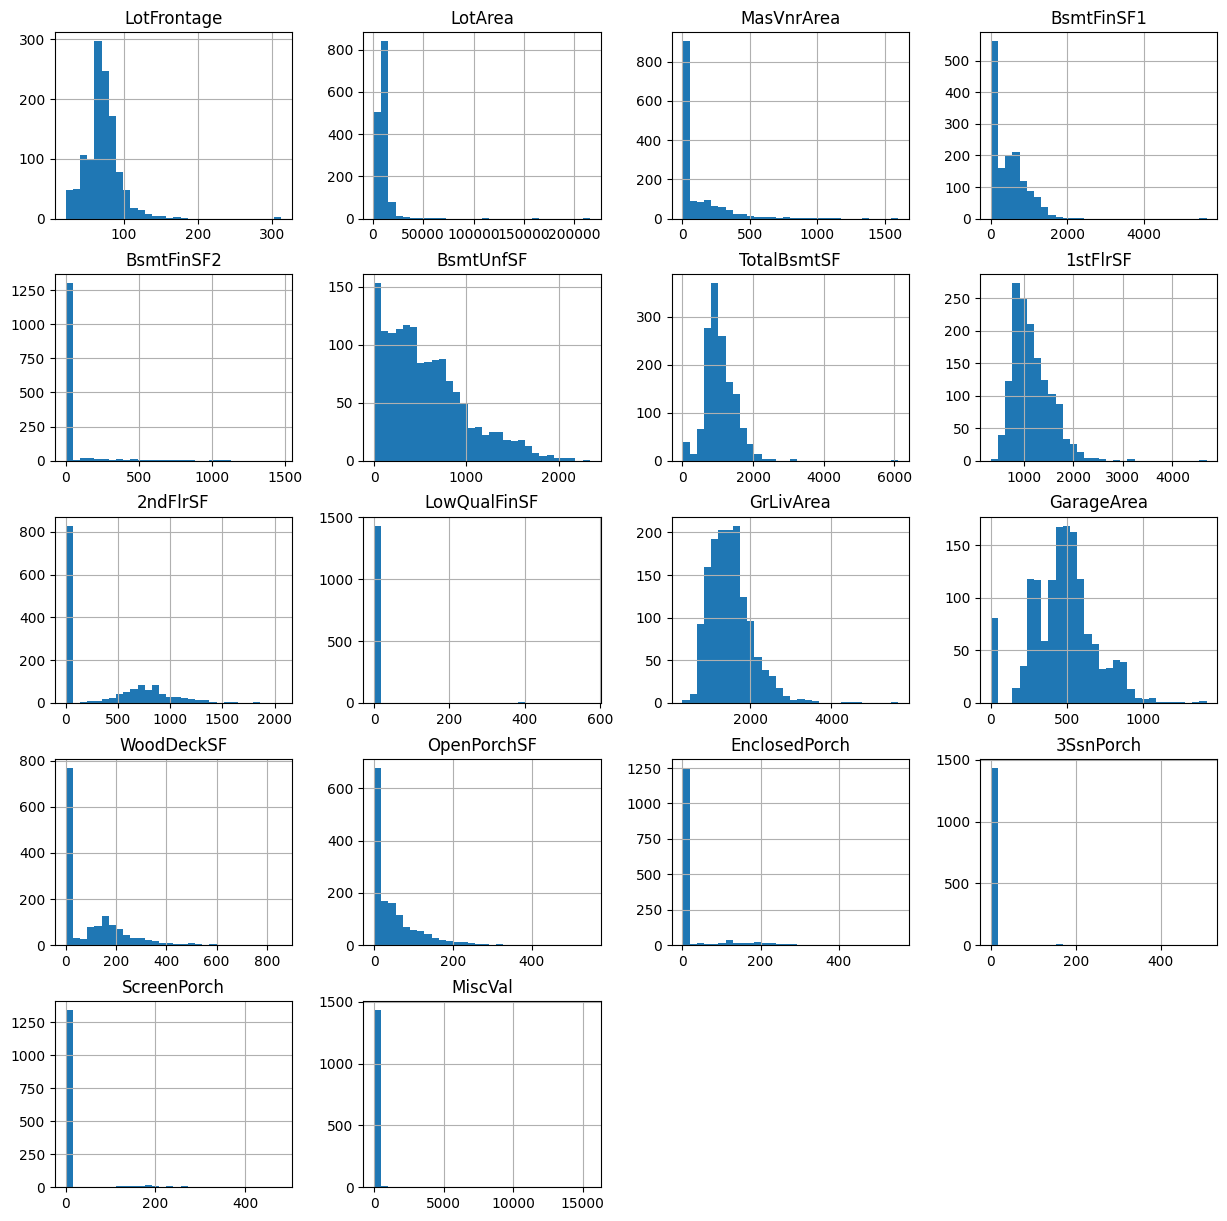

In [30]:
# let's plot histograms for all continuous variables
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()